# Project Apollo

## Goal:
- Objective 1
- Objective 2

# Imports

In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# import wrangle as w
# import explore as e
# import model as m
# import evaluate as ev

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr, f_oneway, ttest_ind, shapiro, levene

np.random.seed(123)

# Acquire
- Data acquired from _____ (e.g. [data.world](https://data.world/food/wine_quality) )
- It contained xx rows and xx columns before cleaning
- Each row represents ____
- Each column represents ____

# Prepare
- Removed ...
- Renamed ...
- Checked for nulls ...
- Checked that column data types were appropriate ...
- Outliers ?
- Added target column?
- Added additional features?
- Encoded categorical variables
- Split data into train, validate, and test (60/20/20), stratifying ...
- Scaled continuous variables


# Data Dictionary

| Feature | Type | Definition |
|:--------|:-----|:-----------|
|feature_1 (target)|integer|definition 1|

In [3]:
## acquireing and preparing data for exploration
df = pd.read_csv('lets_do_this.csv')

In [8]:
def split_data(df):
    '''
    take in a DataFrame and target variable. return train, validate, and test DataFrames.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, 
                                       test_size=.25, 
                                       random_state=123)
    return train, validate, test


In [9]:
## splitting data in to train, validate, and test
train, validate, test = split_data(df)

# A brief look at the data

In [10]:
train.head()

,total_revenue_B,year,quarter,population,median_house_income,federal_fund_rate,unemp_rate,happiness_index,cost_of_living_index,home_ownership_rate,...,palmer_drought_index,eci,inventory_to_sales_ratio,total_flights,case_shiller_index,number_of_disaster,consumer_confidence_index,ease_of_doing_business,jobs_report,consumer_expenditure_survey
24,39.146,2016,4,323.91,66657.0,0.12,4.7,7.1,58.4,63.7,...,-1.40,127.3,1.48,6015820,184.749000,376,100.890333,83.6,447.0,32387.0
1,43.999,2022,3,333.64,78595.0,2.56,3.5,7.0,59.0,66.0,...,-3.43,155.8,1.27,6517588,301.712333,535,96.364630,84.0,1270.0,33088.0
30,38.144,2015,2,320.43,64631.0,0.09,5.3,7.1,56.8,63.4,...,1.70,122.8,1.45,6799173,170.880667,473,100.945633,82.6,771.0,32109.0
23,39.853,2017,1,324.34,67571.0,0.13,4.4,7.0,58.6,63.6,...,-1.23,128.2,1.49,6529978,187.372000,190,101.364367,83.6,567.0,32500.0
21,41.326,2017,3,325.34,67571.0,0.15,4.3,7.0,58.3,63.6,...,-0.31,129.9,1.46,6986514,192.633667,1005,101.183167,83.6,411.0,32500.0


## A summary of the data

In [23]:
train[train.total_revenue_B < 30]

,total_revenue_B,year,quarter,population,median_house_income,federal_fund_rate,unemp_rate,happiness_index,cost_of_living_index,home_ownership_rate,corruption_perception_index,government_spending,ppi_total_manufacturing,gdp_deflated,p_election,midterm_election,violent_crime_rate,cpi_all_items_avg,pce_nondurable_goods,avg_temperature,avg_precipitation,palmer_drought_index,eci,inventory_to_sales_ratio,total_flights,case_shiller_index,number_of_disaster,consumer_confidence_index,ease_of_doing_business,jobs_report,consumer_expenditure_survey


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 24 to 25
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   total_revenue_B              22 non-null     float64
 1   year                         22 non-null     int64  
 2   quarter                      22 non-null     int64  
 3   population                   22 non-null     float64
 4   median_house_income          22 non-null     float64
 5   federal_fund_rate            22 non-null     float64
 6   unemp_rate                   22 non-null     float64
 7   happiness_index              22 non-null     float64
 8   cost_of_living_index         22 non-null     float64
 9   home_ownership_rate          22 non-null     float64
 10  corruption_perception_index  22 non-null     int64  
 11  government_spending          22 non-null     float64
 12  ppi_total_manufacturing      22 non-null     float64
 13  gdp_deflated         

In [14]:
##### to display all columns (df.head())
pd.set_option('display.max_columns', None)

In [15]:
train.describe()

,total_revenue_B,year,quarter,population,median_house_income,federal_fund_rate,unemp_rate,happiness_index,cost_of_living_index,home_ownership_rate,corruption_perception_index,government_spending,ppi_total_manufacturing,gdp_deflated,p_election,midterm_election,violent_crime_rate,cpi_all_items_avg,pce_nondurable_goods,avg_temperature,avg_precipitation,palmer_drought_index,eci,inventory_to_sales_ratio,total_flights,case_shiller_index,number_of_disaster,consumer_confidence_index,ease_of_doing_business,jobs_report,consumer_expenditure_survey
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,38.525636,2017.227273,2.909091,325.360909,68392.772727,0.666818,4.809091,7.022727,56.922727,63.940909,72.500000,4619.612864,195.677545,109.886318,0.227273,0.272727,386.354545,250.328500,99.611682,52.724091,2.615455,0.576818,132.072727,1.430909,6.210784e+06,200.413924,357.318182,100.283774,83.440909,808.681818,32504.409091
std,2.487106,2.486761,1.064988,4.746942,4807.011743,1.010287,1.169008,0.106600,2.111856,2.563602,3.173551,888.600365,17.882167,7.045023,0.428932,0.455842,13.115484,17.081964,4.988495,16.440636,0.574106,2.500700,10.306086,0.084172,6.830927e+05,37.259452,277.846375,1.438790,0.492476,769.654554,481.623807
min,33.900000,2013.000000,1.000000,317.060000,61468.000000,0.080000,3.500000,6.900000,52.000000,53.500000,67.000000,3773.864000,180.800000,102.515000,0.000000,0.000000,362.100000,233.049000,95.969000,31.060000,1.590000,-3.430000,119.100000,1.220000,4.018023e+06,160.103333,44.000000,96.364630,82.600000,411.000000,31417.000000
25%,36.283750,2015.250000,2.000000,321.965000,65137.500000,0.095000,3.925000,6.900000,56.325000,63.700000,69.000000,4066.973250,186.925000,105.150750,0.000000,0.000000,375.625000,239.233000,97.417250,35.985000,2.247500,-1.357500,124.725000,1.442500,5.987513e+06,176.626000,160.750000,99.860396,83.525000,516.500000,32178.500000
50%,38.753500,2017.000000,3.000000,325.070000,67571.000000,0.145000,4.550000,7.000000,57.300000,64.050000,74.000000,4229.399000,192.100000,107.640500,0.000000,0.000000,389.050000,245.739500,98.334500,56.030000,2.530000,0.435000,129.450000,1.465000,6.306024e+06,191.126833,275.000000,100.807100,83.600000,591.500000,32500.000000
75%,40.151500,2019.000000,4.000000,328.007500,71186.000000,0.755000,5.225000,7.100000,58.400000,64.800000,75.000000,4737.020250,196.500000,112.028500,0.000000,0.750000,396.100000,255.657750,99.293500,68.332500,2.782500,1.692500,136.475000,1.480000,6.552973e+06,207.797500,453.500000,101.206692,83.600000,795.000000,32859.000000
max,43.999000,2022.000000,4.000000,334.110000,79405.000000,4.100000,7.900000,7.200000,59.800000,67.400000,76.000000,7116.015000,251.891000,129.508000,1.000000,1.000000,405.000000,296.808000,114.806000,71.760000,4.060000,5.470000,157.600000,1.500000,7.219650e+06,301.712333,1086.000000,101.518100,84.000000,4140.000000,33088.000000


# Explore

## Question 0 (e.g. What is the distribution of the target?)
- NOTE: this question is more of a look at the data, not a stats test question

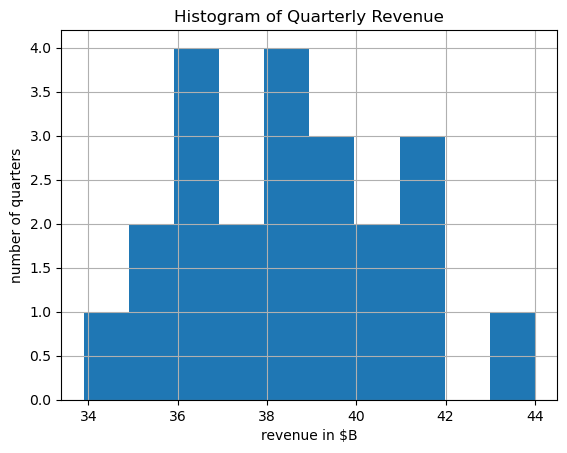

In [30]:
# Example: # get a boxplot and histplot of total_revenue_B of train
train.total_revenue_B.hist()
plt.title('Histogram of Quarterly Revenue')
plt.ylabel('number of quarters')
plt.xlabel('revenue in $B')
plt.show()

## Test to see if total_revenue_B is normally distributed with shapiro test
- $H_0$: The distribution of total_revenue_B is normal
- $H_a$: The distribution is NOT normal
- $\alpha$ = .05

In [40]:
#test all columns for normality.  BL: All columns had p values > .05 which means
# we cannot reject the H0 (i.e. we can assume normality)
for col in train.columns:
    stat, p = shapiro(train.total_revenue_B)
    if p <= .05:
        print(f'{col} column is NOT normally distributed.')

In [31]:
train.columns

Index(['total_revenue_B', 'year', 'quarter', 'population',
       'median_house_income', 'federal_fund_rate', 'unemp_rate',
       'happiness_index', 'cost_of_living_index', 'home_ownership_rate',
       'corruption_perception_index', 'government_spending',
       'ppi_total_manufacturing', 'gdp_deflated', 'p_election',
       'midterm_election', 'violent_crime_rate', 'cpi_all_items_avg',
       'pce_nondurable_goods', 'avg_temperature', 'avg_precipitation',
       'palmer_drought_index', 'eci', 'inventory_to_sales_ratio',
       'total_flights', 'case_shiller_index', 'number_of_disaster',
       'consumer_confidence_index', 'ease_of_doing_business', 'jobs_report',
       'consumer_expenditure_survey'],
      dtype='object')

In [32]:
env_cols = ['avg_temperature', 'avg_precipitation', 'palmer_drought_index', 'number_of_disasters']

## Question 1 (e.g. Is avg_temperature associated with total_revenue_B?)

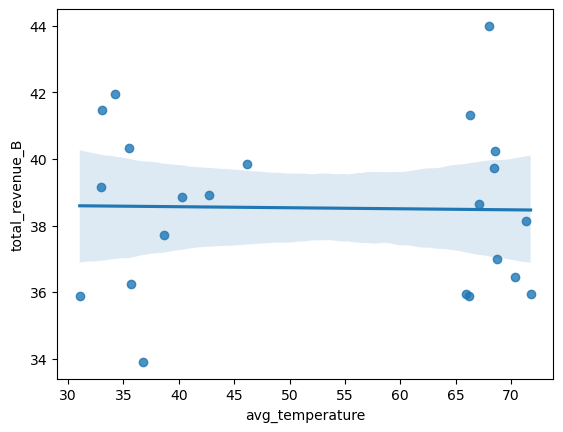

In [33]:
# Visualize Example: # get a regplot of avg_temperature vs total_revenue_B on train
sns.regplot(data=train, x='avg_temperature', y='total_revenue_B')
plt.show()

### Analyze avg_temperature vs total_revenue_B with stats
- $H_0$: There is NO relationship between avg_temperature and total_revenue_B
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Utilize pearsonr - we are comparing continuous variables, normally distributed
    - Check for equal variance first

In [41]:
# H0: the two series have equal_variance;
# Since p < .05; we can reject the H0 which implies that equal_variance is false
stat, p = levene(train.total_revenue_B, train.avg_temperature)
stat, p

(162.69140166439712, 4.90036017287916e-16)

In [43]:
# get the stats from a pearsonr test on feature_x vs target
stat, p = pearsonr(train.total_revenue_B, train.avg_temperature)
stat, p

(-0.020557232835653298, 0.9276492729889874)

### Summarize
- p is > $\alpha$, so we can NOT reject the $H_0$ which suggest there is NOT a relationship between avg_temperature and total_revenue_B (and maybe more description)

## Question 2 (e.g. Is feature_x associated with target?)

In [10]:
# Visualize Example: # get a regplot of squarefeet vs property_value on train
## INSERT CODE HERE

### Analyze feature_x vs target with stats
- $H_0$: There is NO relationship between feature_x and target
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Example 1: Utilize pearsonr - we are comparing continuous variables, normally distributed
    - Example 2:Comparing a categorical to a continuous variable, normally distributed, and equal variance
        - Testing if property value of has_pool == 1 is signicantly greater than has_pool == 0:  one-tail ttest
        - Utilize f_oneway
    - Many other stats tests

In [9]:
# get the stats from a pearsonr test on feature_x vs target
## INSERT CODE HERE

### Summarize
- p is < $\alpha$, so we can reject the $H_0$ which suggest the $H_a$, i.e. there IS a relationship between feature_x and target (and maybe more description)

## Question 3 (e.g. Is feature_x associated with target?)

In [10]:
# Visualize Example: # get a regplot of squarefeet vs property_value on train
## INSERT CODE HERE

### Analyze feature_x vs target with stats
- $H_0$: There is NO relationship between feature_x and target
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Example 1: Utilize pearsonr - we are comparing continuous variables, normally distributed
    - Example 2:Comparing a categorical to a continuous variable, normally distributed, and equal variance
        - Testing if property value of has_pool == 1 is signicantly greater than has_pool == 0:  one-tail ttest
        - Utilize f_oneway
    - Many other stats tests

In [9]:
# get the stats from a pearsonr test on feature_x vs target
## INSERT CODE HERE

### Summarize
- p is < $\alpha$, so we can reject the $H_0$ which suggest the $H_a$, i.e. there IS a relationship between feature_x and target (and maybe more description)

## Question 4 (e.g. Is feature_x associated with target?)

In [10]:
# Visualize Example: # get a regplot of squarefeet vs property_value on train
## INSERT CODE HERE

### Analyze feature_x vs target with stats
- $H_0$: There is NO relationship between feature_x and target
- $H_a$: There IS a relationship
- $\alpha$ = .05
    - Example 1: Utilize pearsonr - we are comparing continuous variables, normally distributed
    - Example 2:Comparing a categorical to a continuous variable, normally distributed, and equal variance
        - Testing if property value of has_pool == 1 is signicantly greater than has_pool == 0:  one-tail ttest
        - Utilize f_oneway
    - Many other stats tests

In [9]:
# get the stats from a pearsonr test on feature_x vs target
## INSERT CODE HERE

### Summarize
- p is < $\alpha$, so we can reject the $H_0$ which suggest the $H_a$, i.e. there IS a relationship between feature_x and target (and maybe more description)

## Exploration Summary
* Plain English bullets as required

* Features that have a relationship with target (stats test for feature_y, feature_z, etc. completed on separate working notebook:
    * feature x ...
    * feature y
    * feature z


### (As Required) Features I am moving to modeling with

### (As Required) Features I am not moving to modeling with

# Modeling
* Evaluation Metrics (example: I will use R^2 and Root Mean Square Error (RMSE) as my evaluation metrics)
    * for R^2, the value is in the range 0-1; closer to 1.0 is better; baseline is 0.0
    * for RMSE, the lower the value the better; baseline is xxx
* The average target is xxx which is the baseline prediction
* I will evaluate x different model types and various hyperparameter configurations
    * (Example: The four model types are Ordinary Least Squares (OLS), LassoLars, Polynomial Regression, Generalized Linear Model (GLM))
* Models will be evaluated on train and validate data
* The model that performs the best will then be evaluated on test

In [11]:
## prep data for modeling
## INSERT CODE HERE (examples below

# scaling continuous variable columns for use in modeling
# to_scale = ['bathrooms', 'bedrooms', 'squarefeet', 'lotsize_sqft', 'year']
# train_scaled, validate_scaled, test_scaled = w.get_minmax_scaled(train, validate, test, to_scale)

# get X y splits for modeling
# X_train_scaled, X_validate_scaled, X_test_scaled, y_train, y_validate, y_test = m.get_X_y_baseline(train_scaled, validate_scaled, test_scaled)

## Model Name (example: Ordinary Least Squares (OLS) Regression)

In [12]:
# get model results
# INSERT CODE HERE

* model name did/did not beat baseline

## Model Name (example: LassoLars)

In [12]:
# get model results
# INSERT CODE HERE

* model name did/did not beat baseline

## Model Name (example: Polynomial Regression)

In [12]:
# get model results
# INSERT CODE HERE

* model name did/did not beat baseline

## Model Name (example: Generalized Linear Model (GLM))

In [12]:
# get model results
# INSERT CODE HERE

* model name did/did not beat baseline

## Comparing Models
* summarize the model performance
* ...
* I have chosen to move forward with the ___ model on test

## Best Model (model name) on Test

In [14]:
# get test results for final model
# INSERT CODE HERE

In [15]:
# maybe a visual of model performance (like a residual plot for a regression model)

## Modeling Summary
* summary bullet 1 ...

# Conclusions

## Exploration
* bullets

## Modeling
* bullets

## Recommendations
* bullets

## Next steps
* bullets